In [1]:
from torchvision.datasets import Omniglot
import os

os.chdir("..")

/home/marco/anaconda3/envs/dl-kit/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libc10_cuda.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [17]:
from core.data.datasets.multiomniglot import MultiOmniglot
import matplotlib.pyplot as plt

In [18]:
n_images = 2

dataset = MultiOmniglot("/data/OMNIGLOT", n_images=n_images, split="val")

In [19]:
dataset.used_alphabets, np.sum([np.log(dataset.n_characters[alphabet]) for alphabet in dataset.used_alphabets])

(['Tifinagh', 'Japanese_(hiragana)', 'Gujarati', 'Japanese_(katakana)'],
 15.679925516431847)

In [20]:
np.log(50000)

10.819778284410283

[38, 24, 28, 45]


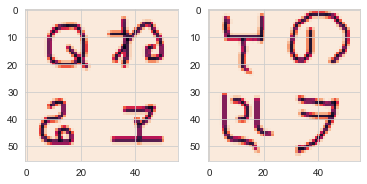

In [21]:
example = dataset[0]

f,ax = plt.subplots(1,2)
ax[0].imshow(example['x'][0])
ax[1].imshow(example['y'][0])
print(example['t'])


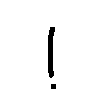

In [38]:
dataset.get_image(dataset.used_alphabets[0], 34, 0)


In [34]:
np.log(55)

4.007333185232471

In [252]:
from torchvision.models import ResNet
from torchvision.models.resnet import BasicBlock
from torch import nn
from functools import partial

in_channels = 1

sizes = [
    0,
    [4, 2],
    [9, 5],
    [14, 7]
]

encoder = nn.Sequential(
    nn.Conv2d(in_channels=in_channels, out_channels=32*n_images, kernel_size=5, stride=3),
    BasicBlock(
        32*n_images, 32*n_images, stride=2,
        norm_layer=lambda x: nn.LayerNorm([x, sizes[n_images][0], sizes[n_images][0]], eps=1e-6),
        downsample=nn.Sequential(
            nn.Conv2d(in_channels=32*n_images, out_channels=32*n_images, kernel_size=1, stride=(2,2), bias=False),
            nn.LayerNorm([32*n_images, sizes[n_images][0], sizes[n_images][0]], eps=1e-6),
        )
    ),
    BasicBlock(
        32*n_images, 32*n_images,
        norm_layer=lambda x: nn.LayerNorm([x, sizes[n_images][0], sizes[n_images][0]], eps=1e-6),
    ),
    BasicBlock(
        32*n_images, 64*n_images, stride=2,
        norm_layer=lambda x: nn.LayerNorm([x, sizes[n_images][1], sizes[n_images][1]], eps=1e-6),
        downsample=nn.Sequential(
            nn.Conv2d(in_channels=32*n_images, out_channels=64*n_images, kernel_size=1, stride=2, bias=False),
            nn.LayerNorm([64*n_images, sizes[n_images][1], sizes[n_images][1]], eps=1e-6),
        )
    ),
    BasicBlock(
        64*n_images, 64*n_images, norm_layer=lambda x: nn.LayerNorm([x, sizes[n_images][1], sizes[n_images][1]], eps=1e-6),
    ),
)

In [253]:
python train.py fit -c config/experiments/omniglot/JS.yaml --data.data_dir=/data --trainer.accelerator=gpu --trainer.default_root_dir=~/results_omniglot --trainer.logger=pytorch_lightning.loggers.WandbLogger --trainer.logger.project=omniglot

Sequential(
  (0): Conv2d(1, 96, kernel_size=(5, 5), stride=(3, 3))
  (1): BasicBlock(
    (conv1): Conv2d(96, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): LayerNorm((96, 14, 14), eps=1e-06, elementwise_affine=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): LayerNorm((96, 14, 14), eps=1e-06, elementwise_affine=True)
    (downsample): Sequential(
      (0): Conv2d(96, 96, kernel_size=(1, 1), stride=(2, 2), bias=False)
      (1): LayerNorm((96, 14, 14), eps=1e-06, elementwise_affine=True)
    )
  )
  (2): BasicBlock(
    (conv1): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): LayerNorm((96, 14, 14), eps=1e-06, elementwise_affine=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): LayerNorm((96, 14, 14), eps=1e-06, elementwise_affine=True)


In [254]:
x = dataset[0]['x'][0].unsqueeze(0).unsqueeze(1).repeat(10,1,1,1)
z = encoder(x)
z.shape

torch.Size([10, 192, 7, 7])

In [223]:
ResNet(BasicBlock, [2,2,2,2]).layer2[0].downsample

Sequential(
  (0): Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
  (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [224]:
downsample(z)
ResNet(BasicBlock, [2, 2, 2, 2]).layer2[0]

BasicBlock(
  (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (downsample): Sequential(
    (0): Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)